# Classic Control with Q-Learning
## A Project Demonstrating the Use of Q-Learning to Solve Control Problems

This uses q-learning to solve the OpenAI gym CartPole environment. The objective of the  
agent is to vertically balance a pole pivoted to a cart by pushing the cart either towards  
the left or the right. The longer the pole is kept vertical, the higher the total  
reward received by the agent. We then apply the same algorithm to solve other control  
problems with minimal adjustment

---

We start off with the usual imports and setting up the environment using the OpenAI gym API.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

env = gym.make('CartPole-v1')

Now we put in settings for how much training is to be done, and also set up some variables to  
help look at our progress while training, once it is complete.

In [2]:
games = 2 ** 13

alpha = 0.15
gamma = 0.995
eps = 0.2
bins = (
    np.linspace(-4.200, 4.200, 32),
    np.linspace(-4.000, 4.000, 32),
    np.linspace(-0.418, 0.418, 32),
    np.linspace(-4.000, 4.000, 32),
)

x = np.arange(games)
y = np.zeros(games)

Once all of this is set up, we proceed to create a Q-Table, simulate the environment, and update  
the Q-Table based on new experiences.

In [3]:
qTable = np.zeros((32, 32, 32, 32, 2), dtype=np.float64)

observation, info = env.reset()
state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

game, totalReward = 0, 0
while game < games:
    if np.random.uniform(0, 1) < eps:
        action = env.action_space.sample()
    else:
        action = np.argmax(qTable[state])

    prevState = state
    observation, reward, terminated, truncated, info = env.step(action)
    state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

    totalReward += reward
    
    qTable[(*prevState, action)] = (1 - alpha) * qTable[(*prevState, action)] + \
        alpha * (reward + (gamma * np.max(qTable[state]) if not terminated else 0))

    if terminated or truncated:
        observation, info = env.reset()
        state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

        print(f'Game {game + 1} / {games}', end=' ' * 32 + '\r')
        game += 1

        y[game - 1] += totalReward
        totalReward = 0

Now that our agent has been trained, lets take a look at the performance improvement  
over all of the training games it played.

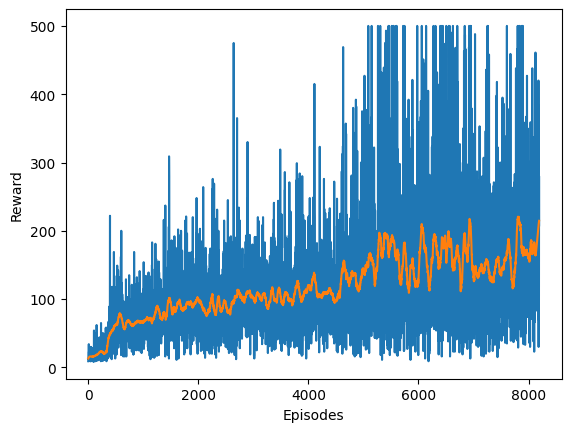

In [4]:
plt.plot(x, y)
plt.plot(x, savgol_filter(y, 2 ** 7, 3))
plt.xlabel('Episodes'); plt.ylabel('Reward')
plt.show()

Let's watch gameplay from our trained agent. Again, we simulate the environment, but this time  
we do not update our Q-Table or try to explore - we are just evaluating the agent's final performance.

In [5]:
env = gym.make('CartPole-v1', render_mode='human')

qTable = np.load(r'saves/cartpole_q.npy')

observation, info = env.reset()
state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

games, game = 8, 0
while game < games:
    action = np.argmax(qTable[state])

    prevState = state
    observation, reward, terminated, truncated, info = env.step(action)
    state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

    if terminated or truncated:
        observation, info = env.reset()
        state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(4))

        print(f'Game {game + 1} / {games}', end=' ' * 32 + '\r')
        game += 1

env.close()

So as we can see now, the agent has acheived pretty much perfect performance and reaches the  
maximum episode length of 500 timesteps every episode.

Applying the same to an inverted pendulum:

In [6]:
env = gym.make('Pendulum-v1', render_mode='human')

bins = (
    np.linspace(-1, 1, 32),
    np.linspace(-1, 1, 32),
    np.linspace(-8, 8, 32),
)

observation, info = env.reset()
state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(3))

with open(r'saves/pendulum_q.npy', 'rb') as file:
    qTable = np.load(file)

games, game = 8, 0
while game < games:
    action = np.argmax(qTable[state])

    prevState = state
    observation, reward, terminated, truncated, info = env.step(np.array([action * 0.5 - 2]))
    state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(3))

    if terminated or truncated:
        observation, info = env.reset()
        state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(3))

        print(f'Game {game + 1} / {games}', end=' ' * 128 + '\r')
        game += 1

env.close()

And to Mountain Car:

In [7]:
env = gym.make('MountainCar-v0', render_mode='human')

bins = (
    np.linspace(-1.20, 0.60, 32),
    np.linspace(-0.07, 0.07, 32),
)

observation, info = env.reset()
state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(2))

with open(r'saves/mountaincar_q.npy', 'rb') as file:
    qTable = np.load(file)

games, game = 8, 0
while game < games:
    action = np.argmax(qTable[state])

    prevState = state
    observation, reward, terminated, truncated, info = env.step(action)
    state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(2))

    if terminated or truncated:
        observation, info = env.reset()
        state = tuple(np.digitize(observation[i], bins[i]) - 1 for i in range(2))

        print(f'Game {game + 1} / {games}', end=' ' * 128 + '\r')
        game += 1        

env.close()

---